# CS345 Project – Student Performance Predictions

**Team Members:**  
- Hind Alshahrani  
- Chase Bishop  

**Dataset:** Student Performance Predictions  
https://www.kaggle.com/datasets/haseebindata/student-performance-predictions


##  Goal

The goal of this project is to predict the final grade of students using machine learning regression models. We will:
- Clean and preprocess the dataset  
- Perform Exploratory Data Analysis (EDA)  
- Train and compare regression models  
- Tune hyperparameters  
- Detect overfitting and underfitting  
- Identify the most important features  

##  Methods

We follow these steps:

1. **Data Cleaning & Preprocessing**
   - Impute missing values  
   - Encode categorical features  
   - Normalize numerical features  
   - Train-test split  

2. **Exploratory Data Analysis**
   - Summary statistics  
   - Correlation heatmap  
   - Visualizations of key relationships  

3. **Modeling**
   - Linear Regression  
   - Ridge Regression  
   - Lasso Regression  
   - Decision Tree Regressor  
   - Random Forest Regressor  

4. **Evaluation**
   - MSE, RMSE, MAE, R²  

5. **Hyperparameter Tuning**
   - Grid Search / Random Search  

6. **Model Diagnostics**
   - Learning curves  
   - Residual analysis  

7. **Feature Importance**


# **1. Data Cleaning & Preprocessing**

In [1]:
import pandas as pnd
import numpy as nmp
import matplotlib.pyplot as pyplt_
import seaborn as snb_
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

studPerf_Data = pnd.read_csv("../data/student_performance_updated_1000.csv")
studPerf_Data = studPerf_Data.dropna(subset=["FinalGrade"])
studPerf_Data = studPerf_Data.drop(columns=["StudentID", "Name"], errors="ignore")
studPerf_Data["Study Hours"] = studPerf_Data["Study Hours"].clip(lower=0)
studPerf_Data["Attendance (%)"] = studPerf_Data["Attendance (%)"].clip(0, 100)
dataCols_ = [
    "AttendanceRate",
    "StudyHoursPerWeek",
    "PreviousGrade",
    "ExtracurricularActivities",
    "Study Hours",
    "Attendance (%)"
]

catCols = [
    "Gender",
    "ParentalSupport",
    "Online Classes Taken"
]

targetCol = "FinalGrade"


numTrans_ = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

catTrans_ = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

prep_ = ColumnTransformer(
    transformers=[
        ("num", numTrans_, dataCols_),
        ("cat", catTrans_, catCols)
    ]
)

# Train-Test Split
X = studPerf_Data.drop(columns=[targetCol])
y = studPerf_Data[targetCol]

StudPerfDB_TrainX, StudPerfDB_TestX, StudPerfDB_ytrain, StudPerfDB_ytest = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Dataset Shape: {studPerf_Data.shape}")
print(f"\nColumns: {studPerf_Data.columns.tolist()}")
print(f"\nData Types:\n{studPerf_Data.dtypes}")
print(f"\nMissing Values:\n{studPerf_Data.isnull().sum()}")
print(f"\nTotal Missing Values: {studPerf_Data.isnull().sum().sum()}")
print(f"\nDuplicate Rows: {studPerf_Data.duplicated().sum()}")

# Display first few rows
print("\nFirst 5 rows:")
print(studPerf_Data.head())


Dataset Shape: (960, 10)

Columns: ['Gender', 'AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport', 'FinalGrade', 'Study Hours', 'Attendance (%)', 'Online Classes Taken']

Data Types:
Gender                        object
AttendanceRate               float64
StudyHoursPerWeek            float64
PreviousGrade                float64
ExtracurricularActivities    float64
ParentalSupport               object
FinalGrade                   float64
Study Hours                  float64
Attendance (%)               float64
Online Classes Taken          object
dtype: object

Missing Values:
Gender                       47
AttendanceRate               37
StudyHoursPerWeek            47
PreviousGrade                31
ExtracurricularActivities    41
ParentalSupport              22
FinalGrade                    0
Study Hours                  22
Attendance (%)               40
Online Classes Taken         23
dtype: int64

Total Missing Values: 310

Dupl

# **2. Exploratory Data Analysis (EDA)**

       AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
count      923.000000         913.000000     929.000000   
mean        85.503792          17.626506      77.609257   
std          7.297872           6.257946       9.976760   
min         70.000000           8.000000      60.000000   
25%         82.000000          12.000000      70.000000   
50%         88.000000          18.000000      78.000000   
75%         91.000000          22.000000      86.000000   
max         95.000000          30.000000      90.000000   

       ExtracurricularActivities  FinalGrade  Study Hours  Attendance (%)  
count                 919.000000  960.000000   938.000000      920.000000  
mean                    1.516866   80.030208     2.450853       76.246739  
std                     1.049685    9.493652     1.459311       14.878653  
min                     0.000000   62.000000     0.000000       50.000000  
25%                     1.000000   72.000000     1.125000       63.000000  
50%         

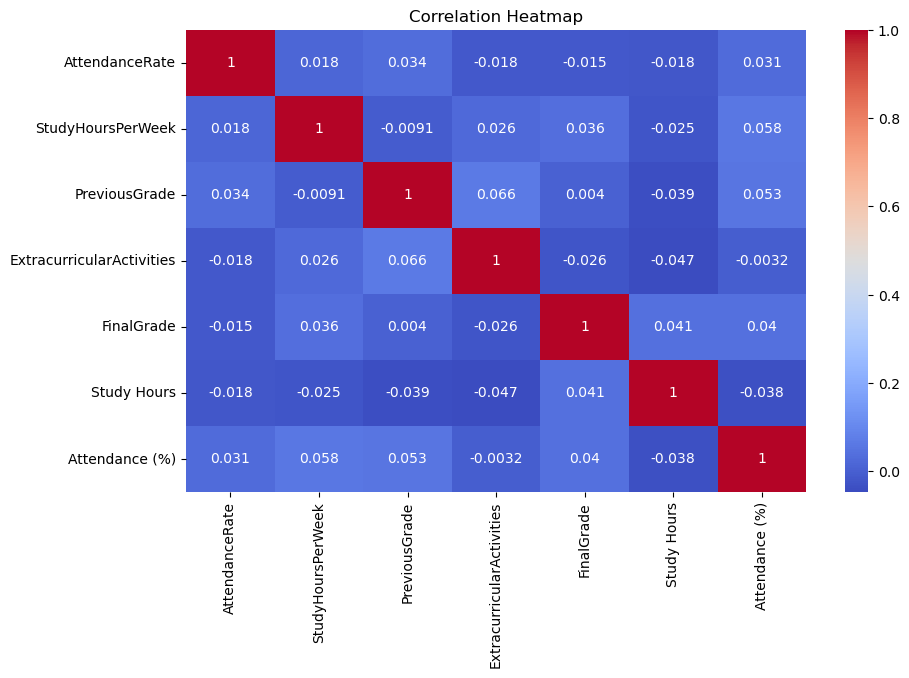

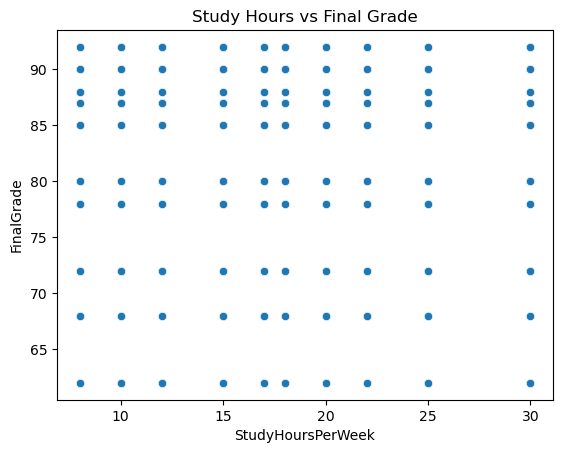

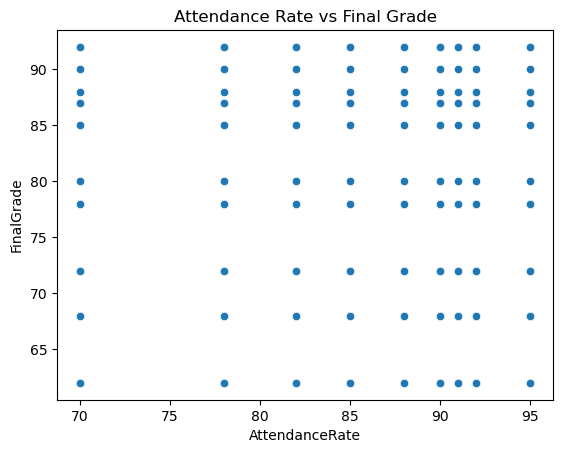

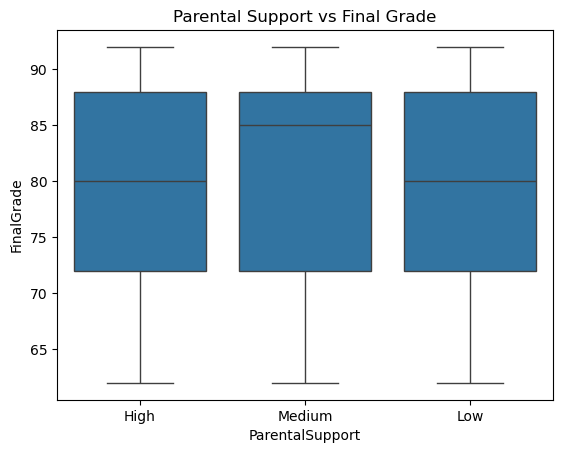

In [2]:
# Statistics
print(studPerf_Data.describe())
print(studPerf_Data.info())

# Correlation
pyplt_.figure(figsize=(10, 6))
snb_.heatmap(studPerf_Data.corr(numeric_only=True), annot=True, cmap="coolwarm")
pyplt_.title("Correlation Heatmap")
pyplt_.show()

#Visualizations
snb_.scatterplot(data=studPerf_Data, x="StudyHoursPerWeek", y="FinalGrade")
pyplt_.title("Study Hours vs Final Grade")
pyplt_.show()

snb_.scatterplot(data=studPerf_Data, x="AttendanceRate", y="FinalGrade")
pyplt_.title("Attendance Rate vs Final Grade")
pyplt_.show()

snb_.boxplot(data=studPerf_Data, x="ParentalSupport", y="FinalGrade")
pyplt_.title("Parental Support vs Final Grade")
pyplt_.show()

Based on the results of the correlation heatmap, there does not appear to be any feature with a strong linear relationship with the label FinalGrade. Looking at a few individual features, the relationship between the features and label is unclear. For this reason, we decided to fit the data both on linear models including types of regression as well as non-linear models to attempt to capture complexity in the data.

# **3. Modeling**

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create models
MLModels_All = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(max_iter=10000),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Fit models with preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

setAll_ML_Model_List = {}

for n, m in MLModels_All.items():
    setP = Pipeline(steps=[
        ("preprocess", prep_),
        ("model", m)
    ])

    setP.fit(StudPerfDB_TrainX, StudPerfDB_ytrain)
    StudPerfDB_Ypred = setP.predict(StudPerfDB_TestX)

    setAll_ML_Model_List[n] = {
        "MSE": mean_squared_error(StudPerfDB_ytest, StudPerfDB_Ypred),
        "RMSE": nmp.sqrt(mean_squared_error(StudPerfDB_ytest, StudPerfDB_Ypred)),
        "MAE": mean_absolute_error(StudPerfDB_ytest, StudPerfDB_Ypred),
        "R2": r2_score(StudPerfDB_ytest, StudPerfDB_Ypred)
    }
# BASELINE MODEL
baseline_pred = nmp.full_like(StudPerfDB_ytest, StudPerfDB_ytrain.mean(), dtype=float)

setAll_ML_Model_List["Baseline (Mean Predictor)"] = {
    "MSE": mean_squared_error(StudPerfDB_ytest, baseline_pred),
    "RMSE": nmp.sqrt(mean_squared_error(StudPerfDB_ytest, baseline_pred)),
    "MAE": mean_absolute_error(StudPerfDB_ytest, baseline_pred),
    "R2": r2_score(StudPerfDB_ytest, baseline_pred),
}

# **4. Evaluation**

In [4]:
eval_studPerf_Data = pnd.DataFrame(setAll_ML_Model_List).T
print(eval_studPerf_Data)

                                  MSE       RMSE       MAE        R2
Linear Regression           89.724409   9.472297  7.984104 -0.018077
Ridge Regression            89.716405   9.471874  7.983598 -0.017986
Lasso Regression            88.176866   9.390254  7.883247 -0.000517
Decision Tree              155.328125  12.463070  9.859375 -0.762463
Random Forest               91.187245   9.549201  8.060573 -0.034675
Baseline (Mean Predictor)   88.176866   9.390254  7.883247 -0.000517


Comparing the evaluations, Lasso appears to have the lowest error, both mean squared and mean absolute, as well as the highest R2 score, so it is the model we decided to tune hyperparameters for Lasso Regression.

# **5. Hyperparameter Tuning**

In [5]:
# HYPERPARAMETER TUNING — LASSO

from sklearn.model_selection import GridSearchCV
lassoParams_ = {
    "model__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 5, 10],
}

lassoPipe_ = Pipeline([
    ("preprocess", prep_),
    ("model", Lasso(max_iter=10000))
])

lassoSearch = GridSearchCV(
    lassoPipe_, lassoParams_,
    cv=5, scoring="r2", n_jobs=-1
)

lassoSearch.fit(StudPerfDB_TrainX, StudPerfDB_ytrain)

lassoYPred_ = lassoSearch.best_estimator_.predict(StudPerfDB_TestX)

setAll_ML_Model_List["Tuned Lasso"] = {
    "MSE": mean_squared_error(StudPerfDB_ytest, lassoYPred_),
    "RMSE": nmp.sqrt(mean_squared_error(StudPerfDB_ytest, lassoYPred_)),
    "MAE": mean_absolute_error(StudPerfDB_ytest, lassoYPred_),
    "R2": r2_score(StudPerfDB_ytest, lassoYPred_),
}

print("Best Lasso Params:", lassoSearch.best_params_)





Best Lasso Params: {'model__alpha': 1}


# **6. Model Diagnostics**

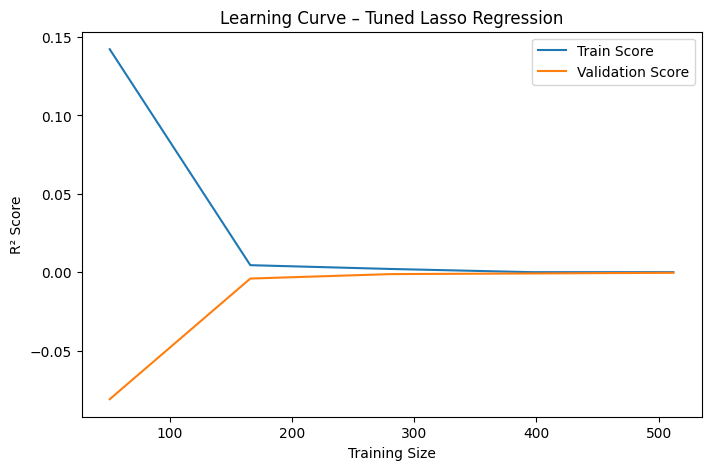

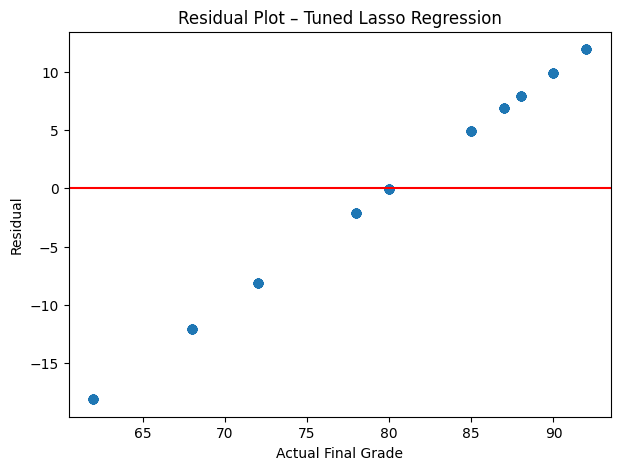

In [6]:
from sklearn.model_selection import learning_curve
#Tuned Lasso Regression
lassoTrainSizes, lassoTrainScores, lassoTestScores = learning_curve(
    lassoSearch.best_estimator_["model"],
    prep_.fit_transform(StudPerfDB_TrainX),
    StudPerfDB_ytrain,
    cv=3,
    scoring='r2'
)

pyplt_.figure(figsize=(8,5))
pyplt_.plot(lassoTrainSizes, lassoTrainScores.mean(axis=1), label="Train Score")
pyplt_.plot(lassoTrainSizes, lassoTestScores.mean(axis=1), label="Validation Score")
pyplt_.legend()
pyplt_.title("Learning Curve – Tuned Lasso Regression")
pyplt_.xlabel("Training Size")
pyplt_.ylabel("R² Score")
pyplt_.show()


bestLasso = lassoSearch.best_estimator_
lassoPred_ = bestLasso.predict(StudPerfDB_TestX)

pyplt_.figure(figsize=(7,5))
pyplt_.scatter(StudPerfDB_ytest, StudPerfDB_ytest - lassoPred_)
pyplt_.axhline(0, color='red')
pyplt_.xlabel("Actual Final Grade")
pyplt_.ylabel("Residual")
pyplt_.title("Residual Plot – Tuned Lasso Regression")
pyplt_.show()

The above plot shows the R2 score as a function of training size, which approaches 0 as training size gets larger.

# **7. Feature Importance**

In [7]:
RandomForest_Reg = RandomForestRegressor(random_state=42)
RandomForest_Reg.fit(prep_.fit_transform(StudPerfDB_TrainX), StudPerfDB_ytrain)

GetImp = RandomForest_Reg.feature_importances_
encoded_cols = prep_.named_transformers_['cat']['encoder'].get_feature_names_out(catCols)
all_cols = nmp.concatenate([dataCols_, encoded_cols])

GetImpFeat_ = pnd.DataFrame({
    "Feature": all_cols,
    "Importance": GetImp
}).sort_values(by="Importance", ascending=False)

print(GetImpFeat_)

                       Feature  Importance
4                  Study Hours    0.209323
5               Attendance (%)    0.204457
2                PreviousGrade    0.129518
1            StudyHoursPerWeek    0.123495
0               AttendanceRate    0.116864
3    ExtracurricularActivities    0.081501
8         ParentalSupport_High    0.024397
10      ParentalSupport_Medium    0.021373
11  Online Classes Taken_False    0.018726
9          ParentalSupport_Low    0.018533
6                Gender_Female    0.018301
12   Online Classes Taken_True    0.017451
7                  Gender_Male    0.016062


#**Summary & Findings**

#Best Model

The Lasso Regression tuned model performed best in general when compared to all the models tested. But, its outcomes were equal to the predictor at the baseline meaning that it did not acquire significant predictive patterns on top of merely predicting the average final grade. It is an indication that the existing data is not rich enough to provide sufficiently strong relationships that the models may exploit.

#Important Features


In spite of the fact that the Random Forest has not been shown to outperform the baseline, the values of its feature importance still offer a valuable idea of which variables should play the most significant role in predicting student performance:

*   Study Hours
*   Attendance
*   Previous Grade


These variables had most significant relationships with final grades throughout the dataset.
#Model Behaviors:

Learning curves displayed underfitting, especially with Lasso that was similar to the baseline. The Random Forest had weak overfitting, yet not to increasing predictive accuracy. The residual plots of both models indicate that there are no deviations with respect to zero, although the deviation is large, as is expected of a model which is not capturing deeper patterns.

#Conclusion

The patterns in the student performance can be well modeled using machine learning, but it is not accurate because of the quality of data and variability. It is likely that in future modeling, better and more meaningful predictive performance could be achieved by improving data quality, including additional behavioral or academic variables, and performing more feature engineering.